In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
from wordcloud import WordCloud
import re

import nltk

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
# from stop_words import get_stop_words

In [2]:
pred_result = pd.read_csv("Working_Prediction.csv").drop('Unnamed: 0', axis = 1)

In [3]:
pred_result.head()

,hour,linked,hash,dot,polarity,subjectivity,year,month,day,minute,text,trump_classification_binary,trump_classification_proba,exist_stock,exist_market,exist_agreement,exist_negotiator,exist_negotiation,exist_trade,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,word_mentions
0,11,False,0,0,0.450000,0.833333,2016,11,9,36,such a beautiful and important evening! the fo...,1,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,True,0,0,1.000000,1.000000,2016,11,10,31,happy 241st birthday to the u.s. marine corps!...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,False,0,0,0.580000,0.676667,2016,11,11,10,a fantastic day in d.c. met with president oba...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,False,0,0,0.009375,0.675000,2016,11,11,19,just had a very open and successful presidenti...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11,False,0,0,0.410000,0.563333,2016,11,11,14,love the fact that the small groups of protest...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
staffer = pred_result[pred_result['trump_classification_binary'] == 1]


In [19]:
staffer_words = staffer['text'].str.cat()
staffer_words_link_removed = re.sub(r"http\S+", "", staffer_words)
staffer_words_amp_removed = re.sub("&amp;", "", staffer_words_link_removed)
finalized_words = re.sub("will", "", staffer_words_amp_removed)

In [6]:
staffer_words_amp_removed

'such a beautiful and important evening! the forgotten man and woman will never be forgotten again. we will all come together as never beforea fantastic day in d.c. met with president obama for first time. really good meeting great chemistry. melania liked mrs. o a lot!just had a very open and successful presidential election. now professional protesters incited by the media are protesting. very unfair!love the fact that the small groups of protesters last night have passion for our great country. we will all come together and be proud!busy day planned in new york. will soon be making some very important decisions on the people who will be running our government!this will prove to be a great time in the lives of all americans. we will unite and we will win win win!wow the @nytimes is losing thousands of subscribers because of their very poor and highly inaccurate coverage of the "trump phenomena"the @nytimes sent a letter to their subscribers apologizing for their bad coverage of me. i

In [7]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(data)
    plt.imshow(wc)
    plt.axis('off')


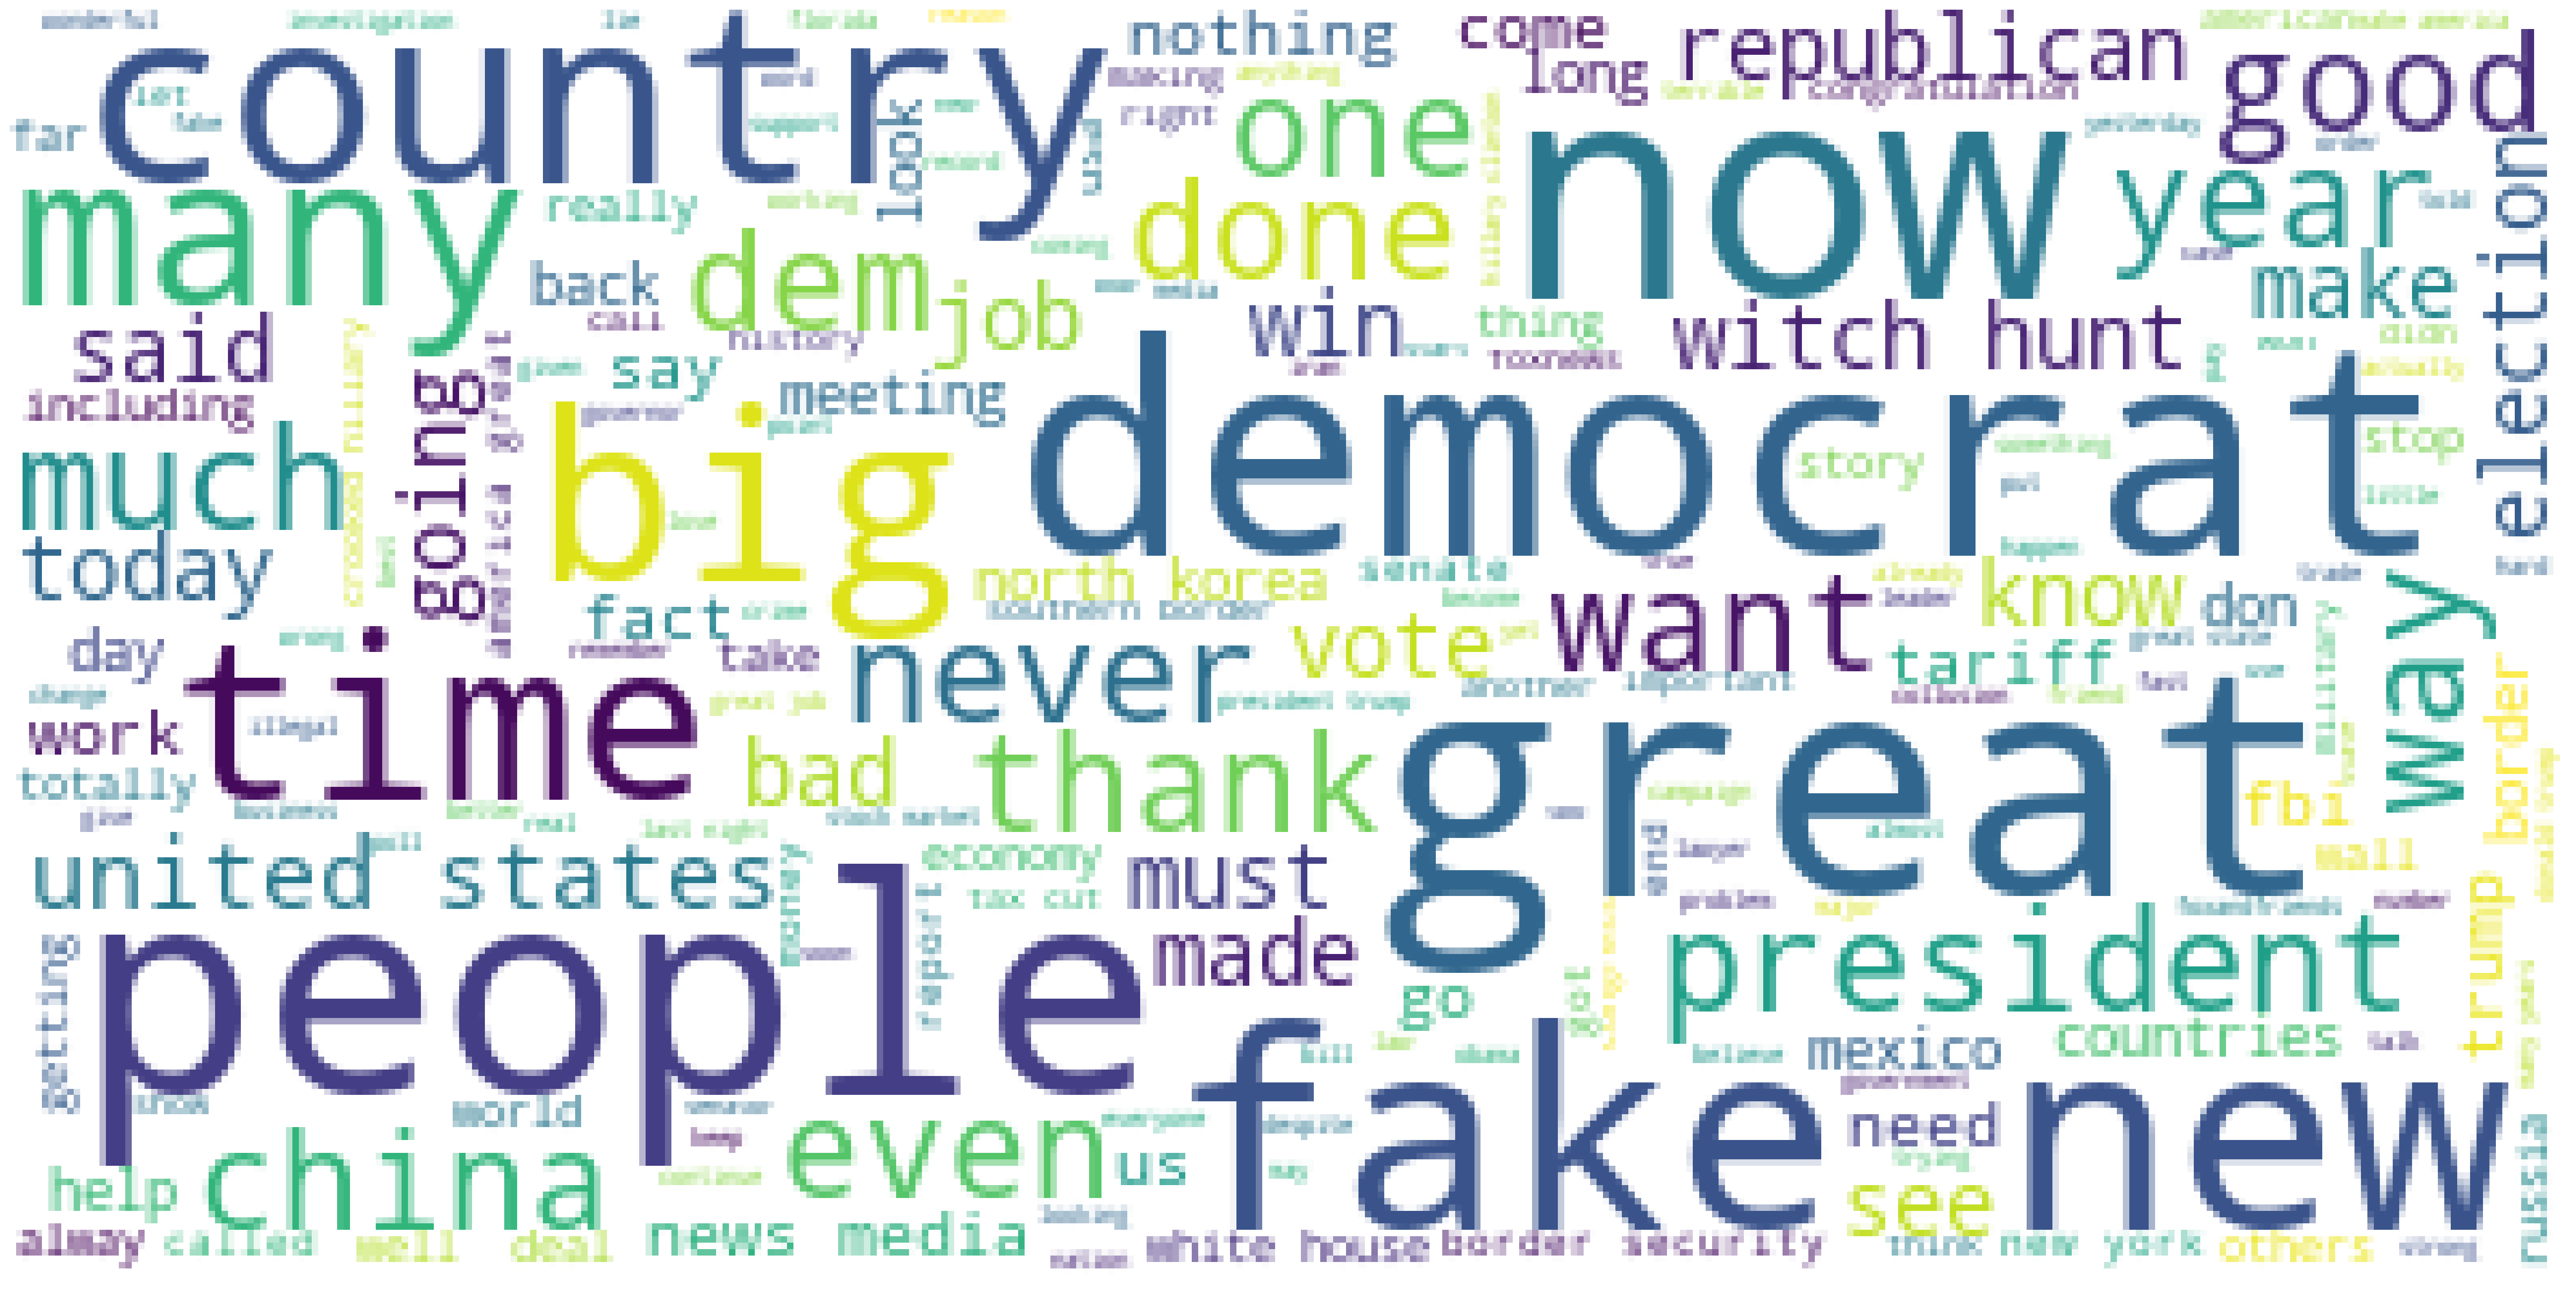

In [23]:
wc(finalized_words, 'white', 'Trump Tweet')

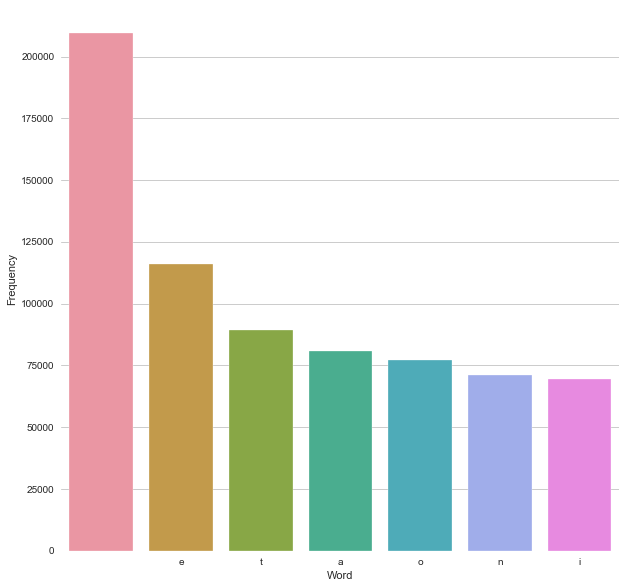

In [14]:
word_dist_desc = nltk.FreqDist(staffer_words_amp_removed)

rslt_desc = pd.DataFrame(word_dist_desc.most_common(7),
                    columns=['Word', 'Frequency'])


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))
